Question 1: Use yfinance to Extract Stock Data

In [ ]:
import yfinance as yf

tesla_data = yf.download('TSLA')
tesla_data.reset_index(inplace=True)
tesla_data_head = tesla_data.head()
print(tesla_data_head)

[*********************100%%**********************]  1 of 1 completed

        Date      Open      High       Low     Close  Adj Close     Volume
0 2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1 2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2 2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4 2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


In [ ]:
# Install requests_html and pyppeteer
!pip install requests-html
!pip install pyppeteer

# Import necessary libraries
import pandas as pd
from requests_html import AsyncHTMLSession
from bs4 import BeautifulSoup
import nest_asyncio

# Apply the nest_asyncio patch
nest_asyncio.apply()

# Define the URL for Tesla revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Set up an async HTML session
session = AsyncHTMLSession()

# Function to fetch and render the page
async def get_tesla_revenue():
    response = await session.get(url)
    await response.html.arender(timeout=20)
    return response

# Fetch the webpage content
response = session.run(get_tesla_revenue)[0]

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.html.html, 'html.parser')

# Find the table containing the revenue data
table = soup.find('table', {'class': 'historical_data_table table'})

# Extract the data from the table
rows = table.find_all('tr')

# Initialize a list to store the data
data = []

# Loop through the rows and extract the columns
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if len(cols) == 2:  # Ensure that the row has two columns
        data.append(cols)

# Convert the list to a DataFrame
tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Clean up the DataFrame
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '')
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(float)

# Display the last five rows of the dataframe
tesla_revenue_tail = tesla_revenue.tail()
print(tesla_revenue_tail)


[INFO] Starting Chromium download.
INFO:pyppeteer.chromium_downloader:Starting Chromium download.
100%|██████████| 183M/183M [00:04<00:00, 38.1Mb/s]
[INFO] Beginning extraction
INFO:pyppeteer.chromium_downloader:Beginning extraction
[INFO] Chromium extracted to: /root/.local/share/pyppeteer/local-chromium/1181205
INFO:pyppeteer.chromium_downloader:Chromium extracted to: /root/.local/share/pyppeteer/local-chromium/1181205


    Date  Revenue
10  2013   2013.0
11  2012    413.0
12  2011    204.0
13  2010    117.0
14  2009    112.0


 Question 2: Use Webscraping to Extract Tesla Revenue Data


In [ ]:
import pandas as pd
from requests_html import AsyncHTMLSession
from bs4 import BeautifulSoup
import nest_asyncio

nest_asyncio.apply()

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

session = AsyncHTMLSession()

async def get_tesla_revenue():
    response = await session.get(url)
    await response.html.arender(timeout=20)
    return response

response = session.run(get_tesla_revenue)[0]
soup = BeautifulSoup(response.html.html, 'html.parser')
table = soup.find('table', {'class': 'historical_data_table table'})
rows = table.find_all('tr')
data = []
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if len(cols) == 2:
        data.append(cols)

tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '')
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(float)
tesla_revenue_tail = tesla_revenue.tail()
print(tesla_revenue_tail)


    Date  Revenue
10  2013   2013.0
11  2012    413.0
12  2011    204.0
13  2010    117.0
14  2009    112.0


In [ ]:

!pip install yfinance



**Use yfinance to Extract Stock **


In [ ]:
import yfinance as yf
import pandas as pd

tesla_data = yf.download('TSLA', start='2010-06-29', end='2023-06-21')
tesla_data.reset_index(inplace=True)


tesla_data.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


**Question 4: Use Webscraping to Extract GME Revenue Data**


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

tables = soup.find_all('table')

# Extracting the second table, which is the quarterly revenue data
revenue_table = tables[1]

rows = revenue_table.find_all('tr')
data = []

for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if len(cols) == 2:
        data.append(cols)

gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Clean the data
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '')
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

gme_revenue.tail()


,Date,Revenue
57,2010-01-31,3524
58,2009-10-31,1835
59,2009-07-31,1739
60,2009-04-30,1981
61,2009-01-31,3492


**Question 5: Plot Tesla Stock Graph**

[*********************100%%**********************]  1 of 1 completed


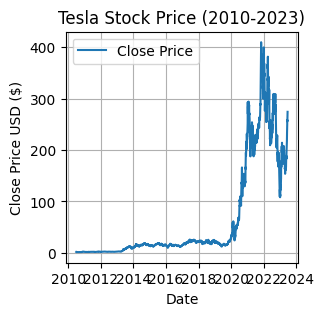

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt


def make_graph(stock_data, title):
    plt.figure(figsize=(3, 3))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.legend()
    plt.grid(True)
    plt.show()


tesla_data = yf.download('TSLA', start='2010-06-29', end='2023-06-21')
tesla_data.reset_index(inplace=True)


make_graph(tesla_data, 'Tesla Stock Price (2010-2023)')


**Question 6: Plot GameStop Stock Graph**

[*********************100%%**********************]  1 of 1 completed


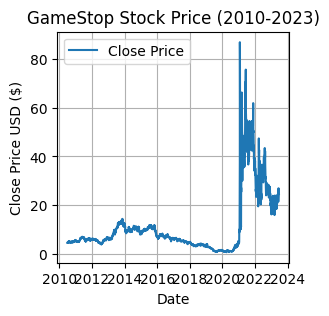

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
def make_graph(stock_data, title):
    plt.figure(figsize=(3, 3))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.legend()
    plt.grid(True)
    plt.show()

gme_data = yf.download('GME', start='2010-06-29', end='2023-06-21')
gme_data.reset_index(inplace=True)
make_graph(gme_data, 'GameStop Stock Price (2010-2023)')
